In [1]:
pip show pm4py

Name: pm4py
Version: 2.7.9.4
Summary: Process mining for Python
Home-page: https://pm4py.fit.fraunhofer.de
Author: Fraunhofer Institute for Applied Information Technology FIT
Author-email: pm4py@fit.fraunhofer.de
License: GPL 3.0
Location: /home/gridone/Downloads/kkb/layout_detector/test-llm/lib/python3.11/site-packages
Requires: cvxopt, deprecation, graphviz, intervaltree, lxml, matplotlib, networkx, numpy, pandas, pydotplus, pytz, scipy, stringdist, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.


## Process and Notes
- Import various libraries
- Read CSV files
- Change to XES format
- Filtering XES (if necessary)
- Visualize various algorithms
- Reference URL: https://pm4py.fit.fraunhofer.de/
- Reference URL: https://process-mining.tistory.com/140


## 0. Import various libraries


In [14]:
import statistics as stat
import pm4py as pm
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

from pm4py.objects.log.importer.xes import importer
from pm4py.objects.conversion.log.converter import to_data_frame
from pm4py.algo.filtering.pandas.attributes import attributes_filter
#from pm4py.statistics.traces.log import case_statistics
from pm4py.objects.log.util import interval_lifecycle
#from pm4py.statistics.traces.log import case_arrival
#from pm4py.statistics.sojourn_time.log import get as soj_time_get
from pm4py.visualization.graphs import visualizer as graphs_visualizer
from pm4py.util import constants
#from pm4py.algo.filtering.log.timestamp import timestamp_filter
#from pm4py.algo.filtering.log.end_activities import end_activities_filter
#from pm4py.algo.filtering.log.start_activities import start_activities_filter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.decisiontree import visualizer as tree_visualizer
from pm4py.algo.decision_mining import algorithm as decision_mining

/home/gridone/Downloads/kkb/layout_detector/test-llm/lib/python3.11/site-packages/pm4py/visualization/decisiontree/__init__.py:23: UserWarning: The decisiontree visualizer will be removed in a future release (use Scikit Learn instead).
  warnings.warn("The decisiontree visualizer will be removed in a future release (use Scikit Learn instead).")
/home/gridone/Downloads/kkb/layout_detector/test-llm/lib/python3.11/site-packages/pm4py/algo/decision_mining/__init__.py:23: UserWarning: The decision_mining package will be removed in a future release.
  warnings.warn("The decision_mining package will be removed in a future release.")


## 1. Reading CSV files
 - CSV file download path: https://pm.fit.fraunhofer.de/static/assets/data/getting_started/running-example.csv

In [4]:
file_path = 'running-example.csv'
event_log_csv = pd.read_csv(file_path, sep=';')
event_log_csv

,case_id,activity,timestamp,costs,resource
0,3,register request,2010-12-30 14:32:00+01:00,50,Pete
1,3,examine casually,2010-12-30 15:06:00+01:00,400,Mike
2,3,check ticket,2010-12-30 16:34:00+01:00,100,Ellen
3,3,decide,2011-01-06 09:18:00+01:00,200,Sara
4,3,reinitiate request,2011-01-06 12:18:00+01:00,200,Sara
5,3,examine thoroughly,2011-01-06 13:06:00+01:00,400,Sean
6,3,check ticket,2011-01-08 11:43:00+01:00,100,Pete
7,3,decide,2011-01-09 09:55:00+01:00,200,Sara
8,3,pay compensation,2011-01-15 10:45:00+01:00,200,Ellen
9,2,register request,2010-12-30 11:32:00+01:00,50,Mike


In [17]:
file_path = 'running-daum.csv'
event_log_csv = pd.read_csv(file_path, sep=';')
event_log_csv.head(3)

,case_id,activity,timestamp,costs,resource
0,3,Daum - Google Chrome - Kibeom,2024-02-20 15:19:53,3.967903,click left
1,3,Daum - Google Chrome - Kibeom,2024-02-20 15:19:53,0.168136,click left
2,3,Daum - Google Chrome - Kibeom,2024-02-20 15:19:54,0.409923,click left


## 2. Change to XES format

In [1]:
## 2.1. EDA
def _21_plot_xes(event_log_xes):
    # Derive list of activities
    activities = attributes_filter.get_attribute_values(event_log_xes, attribute_key="concept:name")
    # Derive list of resources
    resources = attributes_filter.get_attribute_values(event_log_xes, attribute_key="resource")

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
    ax = ax.ravel()
    ax[0].bar(x=list(activities.keys()), height=list(activities.values()))
    ax[0].set_title("Activity Distribution", fontsize=20)
    ax[1].bar(x=list(resources.keys()), height=list(resources.values()))
    ax[1].set_title("Resource Distribution", fontsize=20)

/home/gridone/Downloads/kkb/layout_detector/test-llm/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54016 (\N{HANGUL SYLLABLE TIM}) missing from current font.
  func(*args, **kwargs)
/home/gridone/Downloads/kkb/layout_detector/test-llm/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  func(*args, **kwargs)
/home/gridone/Downloads/kkb/layout_detector/test-llm/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54021 (\N{HANGUL SYLLABLE TING}) missing from current font.
  func(*args, **kwargs)
/home/gridone/Downloads/kkb/layout_detector/test-llm/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53665 (\N{HANGUL SYLLABLE TOG}) missing from current font.
  func(*args, **kwargs)
/home/gridone/Downloads/kkb/layout_detector/test-llm/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE S

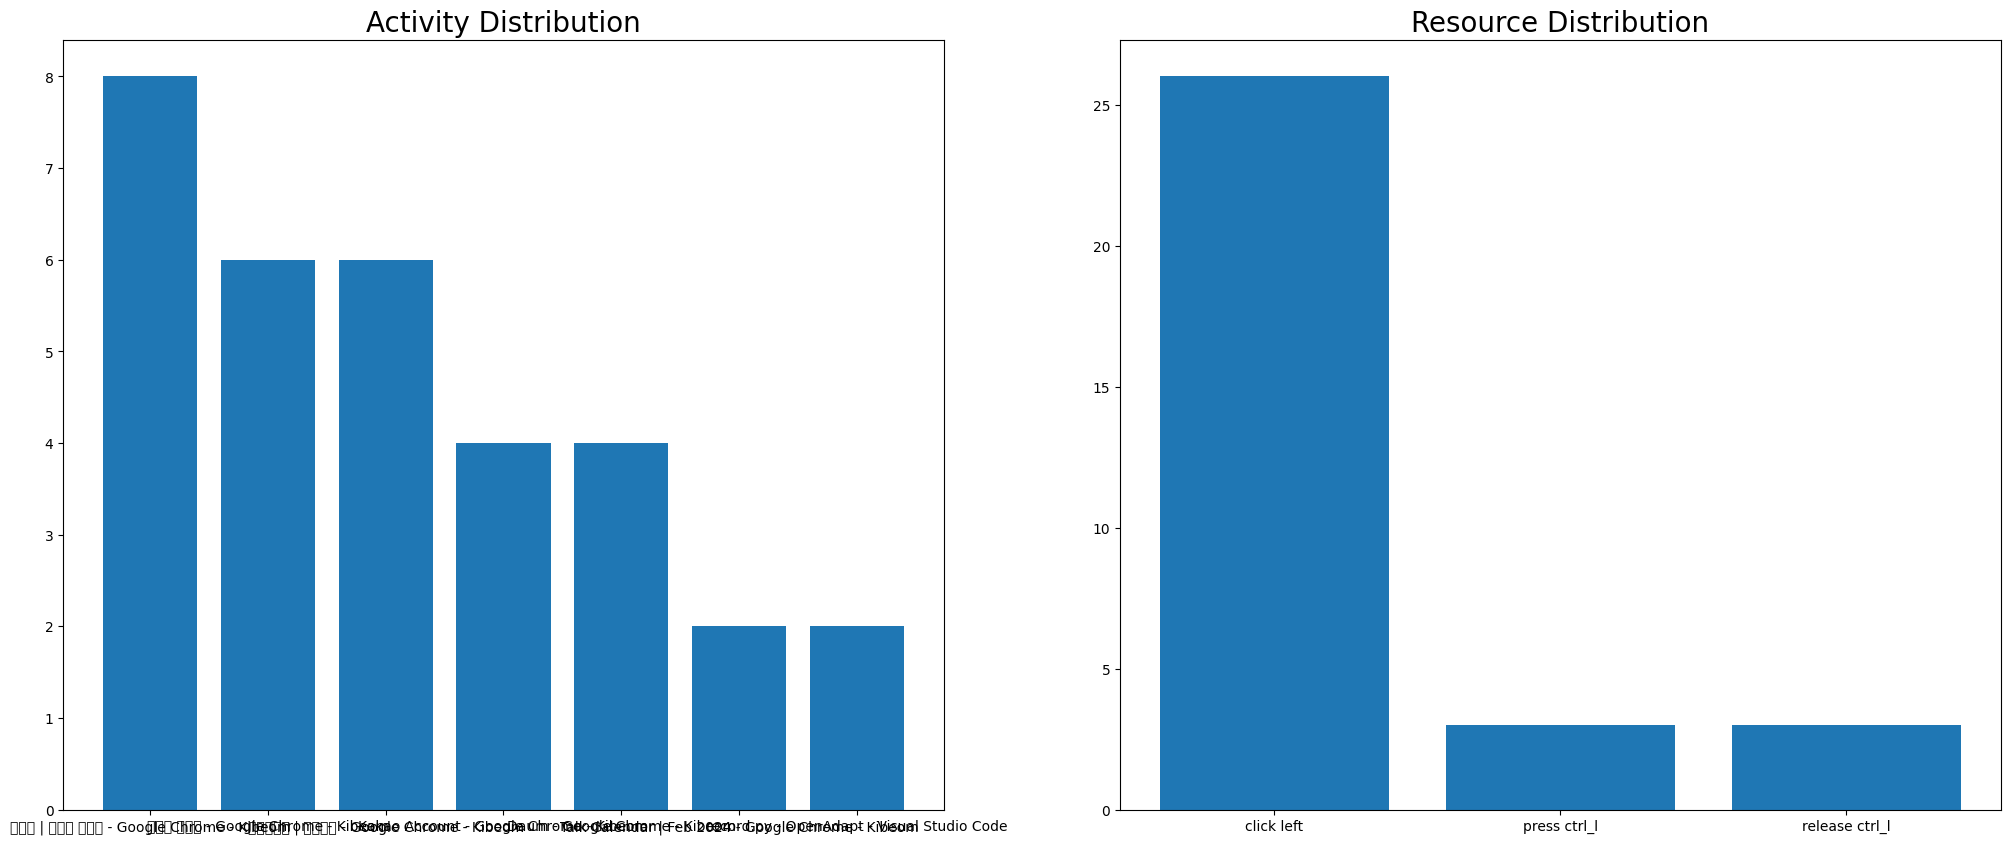

In [19]:
event_log_csv_copied = event_log_csv.copy()
event_log_xes = pm.format_dataframe(event_log_csv_copied, case_id='case_id',activity_key='activity', timestamp_key='timestamp')
event_log_xes.head(3)
_21_plot_xes(event_log_xes)

## 3. Filtering examples

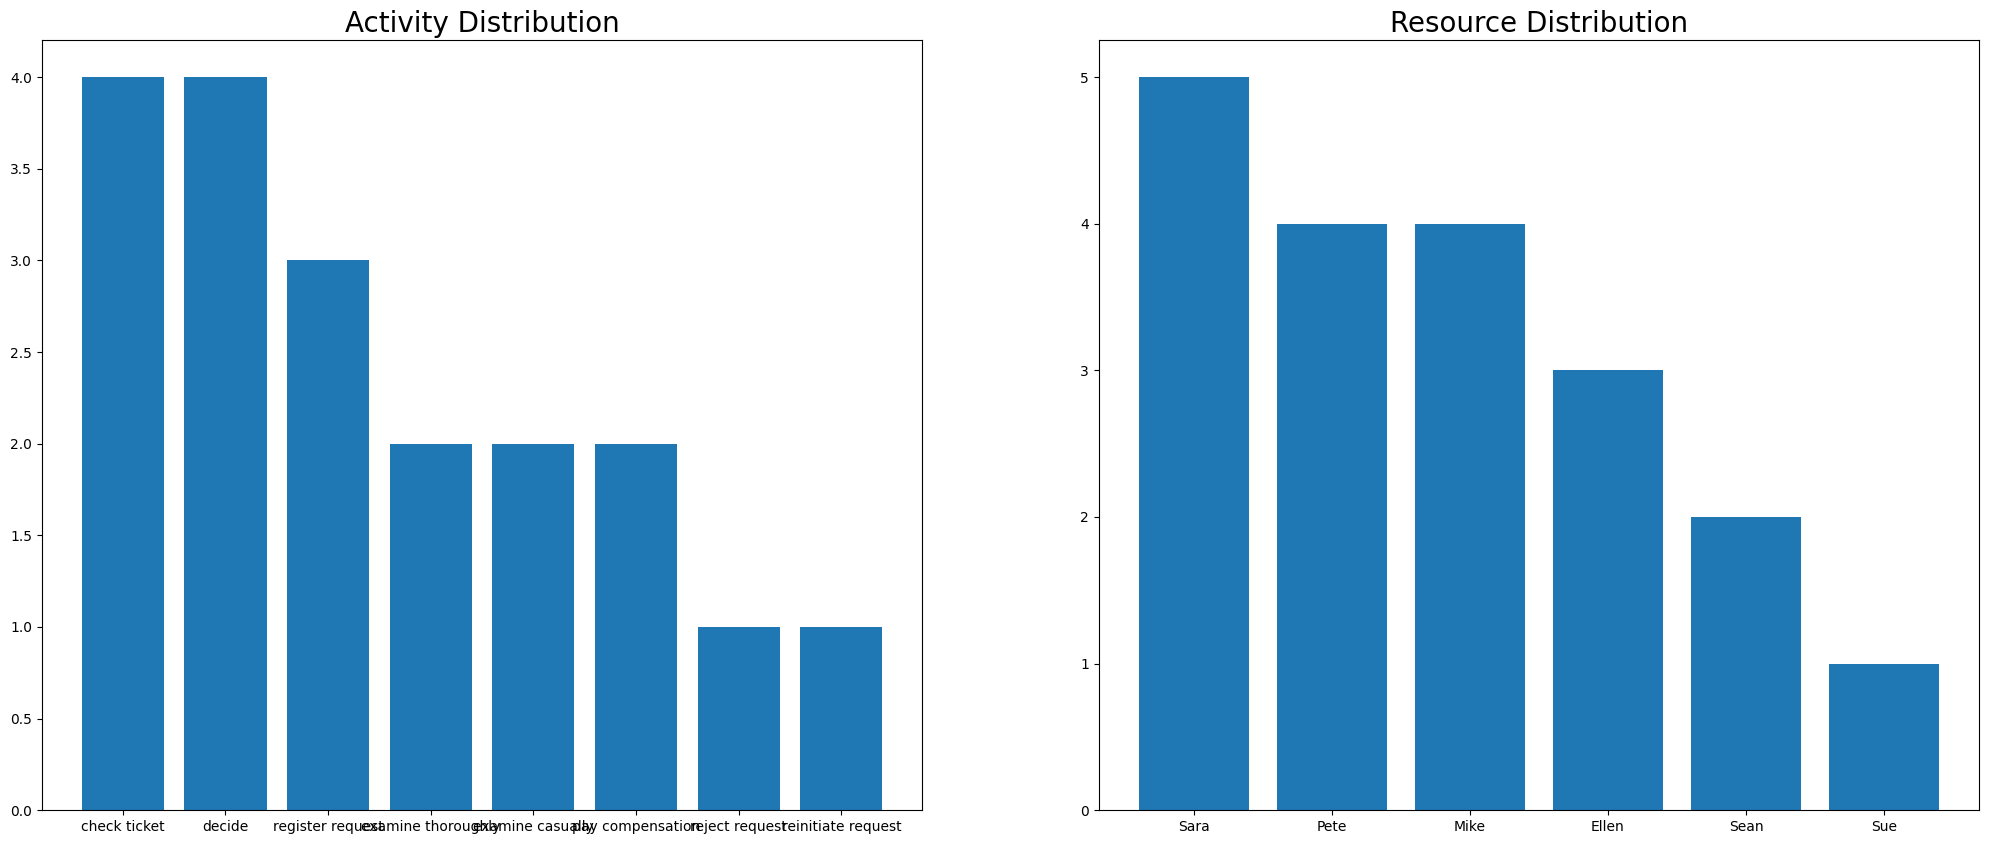

In [7]:
filtered = pm.filter_start_activities(event_log_xes, {'register request'})

filtered = pm.filter_start_activities(event_log_xes, {'register request TYPO!'})

filtered = pm.filter_end_activities(event_log_xes, {'pay compensation'})

filtered = pm.filter_event_attribute_values(event_log_xes, 'resource', {'Pete', 'Mike'})

filtered = pm.filter_event_attribute_values(event_log_xes, 'resource', {'Pete', 'Mike'}, level='event')

filtered = pm.filter_trace_attribute_values(event_log_xes, 'concept:name', {'3', '4'})

filtered = pm.filter_trace_attribute_values(event_log_xes, 'concept:name', {'3', '4'}, retain=False)

filtered = pm.filter_variants(event_log_xes, [
    ['register request', 'check ticket', 'examine casually', 'decide', 'pay compensation']])

filtered = pm.filter_variants(event_log_xes, [
    ['register request', 'check ticket', 'examine casually', 'decide', 'reject request']])

filtered = pm.filter_directly_follows_relation(event_log_xes, [('check ticket', 'examine casually')])

filtered = pm.filter_eventually_follows_relation(event_log_xes, [('examine casually', 'reject request')])

filtered = pm.filter_time_range(event_log_xes, dt.datetime(2010, 12, 30), dt.datetime(2010, 12, 31), mode='events')

filtered = pm.filter_time_range(event_log_xes, dt.datetime(2010, 12, 30), dt.datetime(2010, 12, 31),
                                    mode='traces_contained')

filtered = pm.filter_time_range(event_log_xes, dt.datetime(2010, 12, 30), dt.datetime(2010, 12, 31),
                                    mode='traces_intersecting')


filtered.head(3)
_21_plot_xes(filtered)

## 4. Visualization of Various Algorithms
- Graphviz must be installed beforehand: https://graphviz.org/download/
  - Preferably a lower version
  - Check whether 32 or 64 bit
  - Select the option to set PATH automatically during installation
  - Restart Python (VS Code or Jupyter - no need to reboot PC)


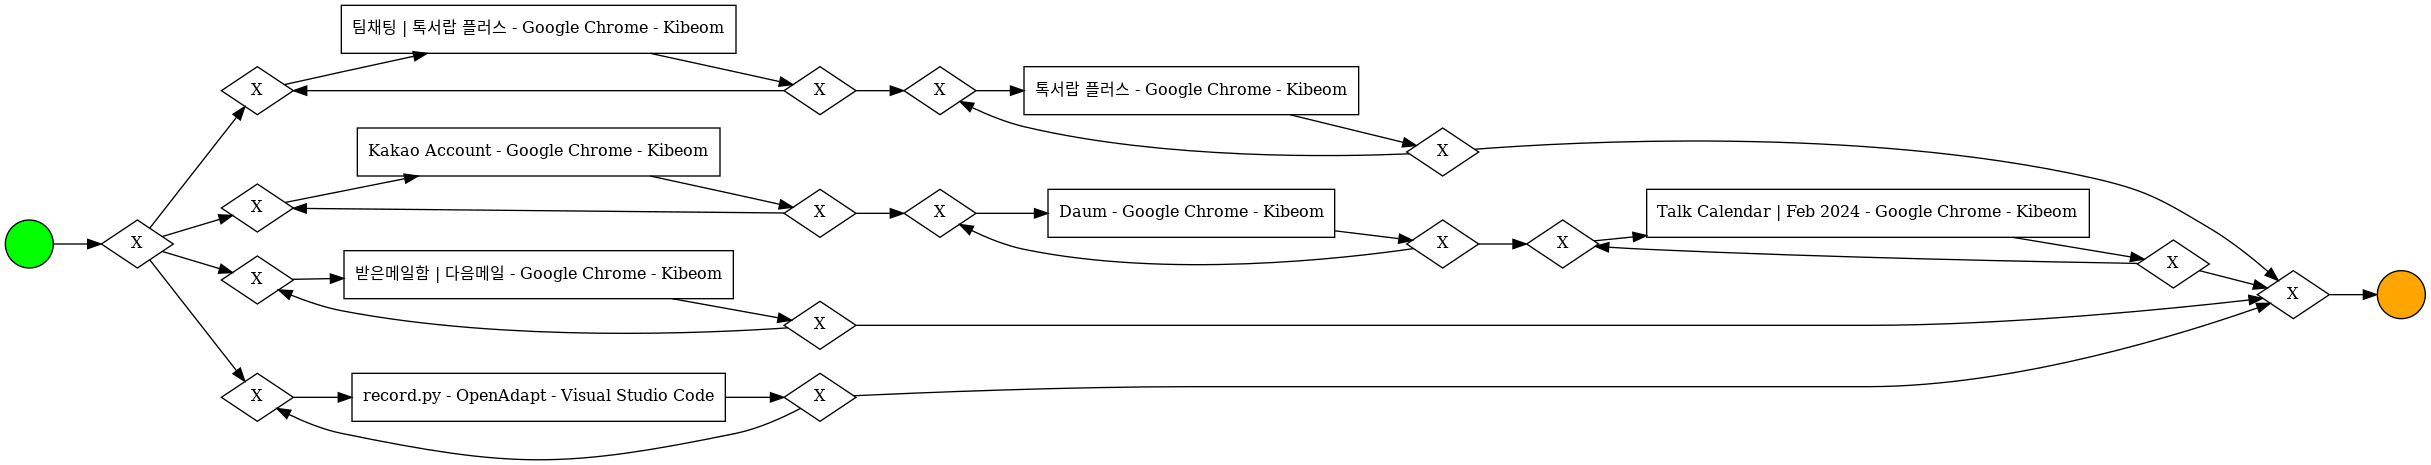

In [20]:
process_tree = pm.discover_process_tree_inductive(event_log_xes)
bpmn_model = pm.convert_to_bpmn(process_tree)
pm.view_bpmn(bpmn_model)

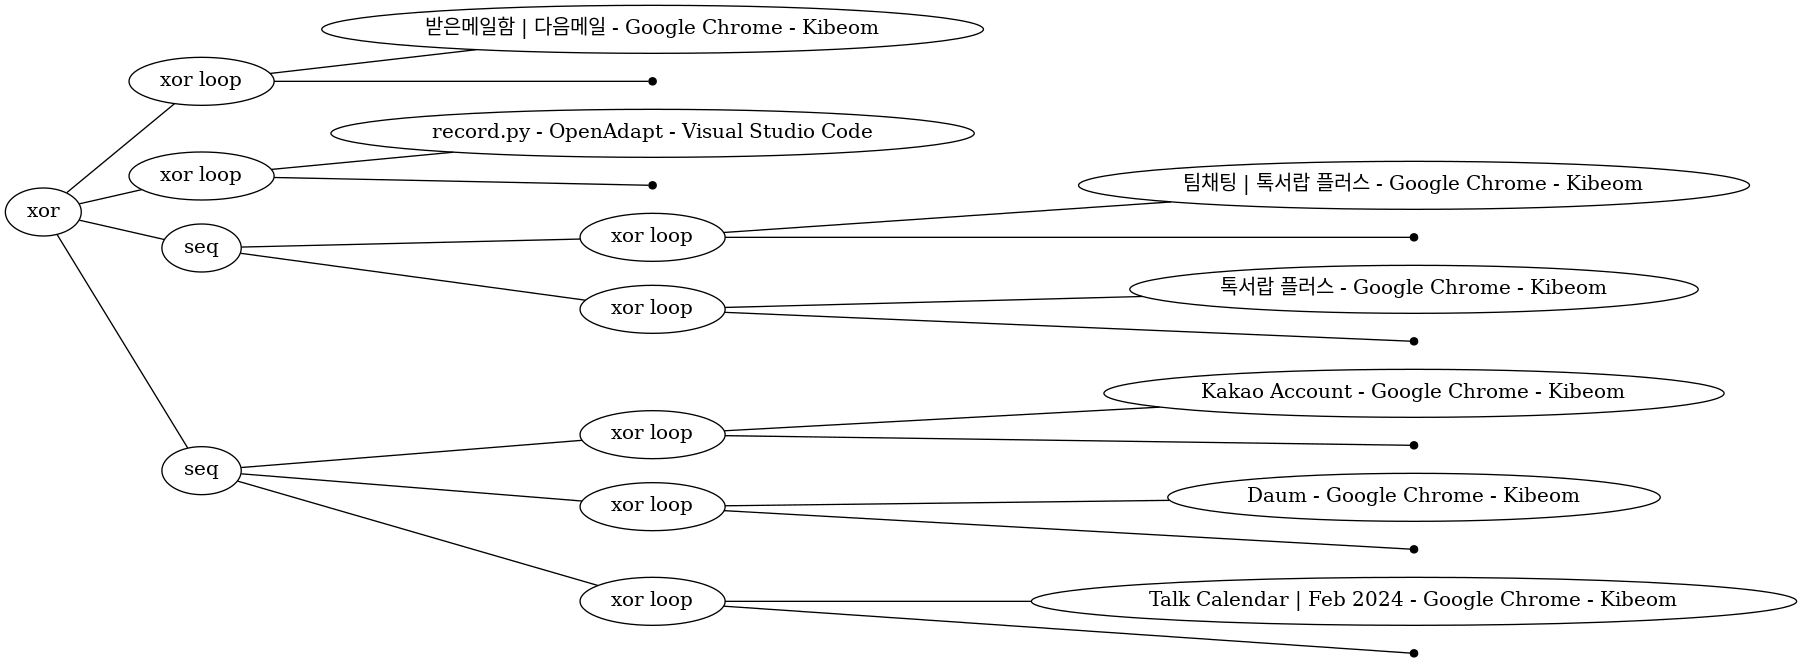

In [21]:
process_tree = pm.discover_process_tree_inductive(event_log_xes)
pm.view_process_tree(process_tree)

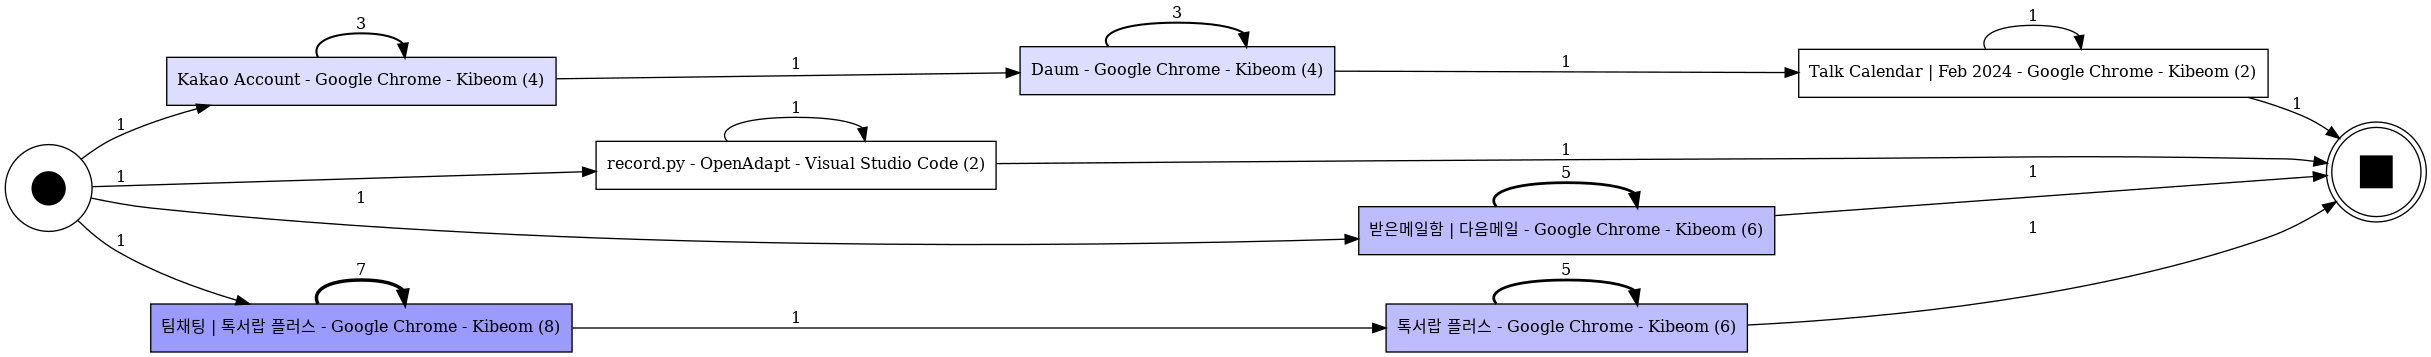

In [22]:
dfg, start_activities, end_activities = pm.discover_dfg(event_log_xes)
pm.view_dfg(dfg, start_activities, end_activities)

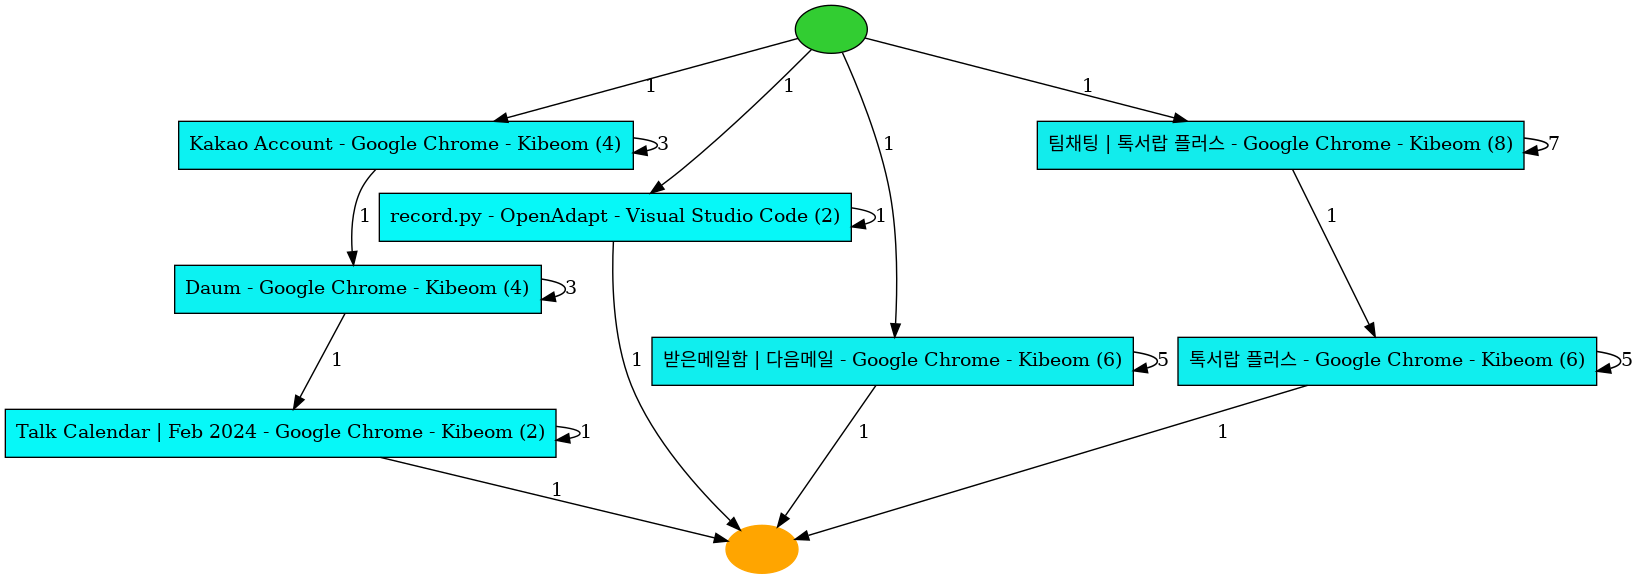

In [23]:
map = pm.discover_heuristics_net(event_log_xes)
pm.view_heuristics_net(map)

In [12]:
event_log_csv.head(3)

,case_id,activity,timestamp,costs,resource
0,3,register request,2010-12-30 14:32:00+01:00,50,Pete
1,3,examine casually,2010-12-30 15:06:00+01:00,400,Mike
2,3,check ticket,2010-12-30 16:34:00+01:00,100,Ellen


In [13]:
event_log_xes

,case_id,activity,timestamp,costs,resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index,start_timestamp
0,1,register request,2010-12-30 10:02:00+00:00,50,Pete,1,register request,2010-12-30 10:02:00+00:00,0,0,2010-12-30 10:02:00+00:00
1,1,examine thoroughly,2010-12-31 09:06:00+00:00,400,Sue,1,examine thoroughly,2010-12-31 09:06:00+00:00,1,0,2010-12-31 09:06:00+00:00
2,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,1,check ticket,2011-01-05 14:12:00+00:00,2,0,2011-01-05 14:12:00+00:00
3,1,decide,2011-01-06 10:18:00+00:00,200,Sara,1,decide,2011-01-06 10:18:00+00:00,3,0,2011-01-06 10:18:00+00:00
4,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,1,reject request,2011-01-07 13:24:00+00:00,4,0,2011-01-07 13:24:00+00:00
5,2,register request,2010-12-30 10:32:00+00:00,50,Mike,2,register request,2010-12-30 10:32:00+00:00,5,1,2010-12-30 10:32:00+00:00
6,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,2,check ticket,2010-12-30 11:12:00+00:00,6,1,2010-12-30 11:12:00+00:00
7,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,2,examine casually,2010-12-30 13:16:00+00:00,7,1,2010-12-30 13:16:00+00:00
8,2,decide,2011-01-05 10:22:00+00:00,200,Sara,2,decide,2011-01-05 10:22:00+00:00,8,1,2011-01-05 10:22:00+00:00
9,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,2,pay compensation,2011-01-08 11:05:00+00:00,9,1,2011-01-08 11:05:00+00:00


In [21]:
# pip uninstall nbconvert


Note: you may need to restart the kernel to use updated packages.


In [22]:
# pip install nbconvert==5.6.1

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python38-32\python.exe -m pip install --upgrade pip' command.
